In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import qp
import individual_metrics as inmet
import skgof
%matplotlib inline

# Test 10% of Ibrahim's data

In [2]:
infile = "/Users/samschmidt/PZPAPER/mystuff/IBRAHIM/everytenth_PDF.out"
szfile = "/Users/samschmidt/PZPAPER/mystuff/IBRAHIM/everytenth_idszimag.out"
z_array = np.arange(0.0,2.0050,0.0100) #this is the grid that Ibrahim uses
print z_array
tmpdata = np.loadtxt(szfile)
z_trues = tmpdata[:,1]
mags = tmpdata[:,2]
alldata = np.loadtxt(infile)
ID = alldata[:,0]
pzs = alldata[:,1:]
ngals = len(ID)
print z_trues

[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35
  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59
  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71
  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83
  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95
  0.96  0.97  0.98  0.99  1.    1.01  1.02  1.03  1.04  1.05  1.06  1.07
  1.08  1.09  1.1   1.11  1.12  1.13  1.14  1.15  1.16  1.17  1.18  1.19
  1.2   1.21  1.22  1.23  1.24  1.25  1.26  1.27  1.28  1.29  1.3   1.31
  1.32  1.33  1.34  1.35  1.36  1.37  1.38  1.39  1.4   1.41  1.42  1.43
  1.44  1.45  1.46  1.47  1.48  1.49  1.5   1.51  1.52  1.53  1.54  1.55
  1.56  1.57  1.58  1.59  1.6   1.61  1.62  1.63  1

In [3]:
bpz_approx_pdf = qp.Ensemble(pzs.shape[0],gridded=(z_array,pzs))

made the pool of 4 in 0.0380280017853
made the catalog in 178.735646009


In [4]:
bpzobj = inmet.EvaluateMetric(bpz_approx_pdf,z_trues)

In [5]:
bpzPIT = bpzobj.PIT()

In [6]:
ks_stat,ks_pval = bpzobj.KS(using='gridded',dx=0.0001)
print ks_stat
print ks_pval

0.0695621735947
0.00269726830534


In [7]:
cvm_stat,cvm_pval=bpzobj.CvM(using='gridded',dx=0.0001)
print cvm_stat
print cvm_pval

156.680544205
0.0217237637062


In [8]:
ad_stat,ad_pval=bpzobj.AD(using='gridded',dx=0.0001,vmin=0.05,vmax=0.95)
print ad_stat
print ad_pval

now with proper uniform range
845.191285163
6.48221176736e-09


In [9]:
ad_stat,ad_pval=bpzobj.AD(using='gridded',dx=0.0001,vmin=0.1,vmax=0.9)
print ad_stat
print ad_pval

now with proper uniform range
538.021439316
6.96831736757e-09


In [10]:
ad_stat,ad_pval=bpzobj.AD(using='gridded',dx=0.0001,vmin=0.0,vmax=1.0)
print ad_stat
print ad_pval

now with proper uniform range
959.575470765
5.99784077959e-09


In [11]:
ad_stat,ad_pval=bpzobj.AD(using='gridded',dx=0.0001,vmin=0.8,vmax=0.95)
print ad_stat
print ad_pval

now with proper uniform range
51.3510414982
4.95008662948e-08


In [12]:
ad_stat,ad_pval=bpzobj.AD(using='gridded',dx=0.0001,vmin=0.8,vmax=1.0)
print ad_stat
print ad_pval

now with proper uniform range
141.391482791
3.6827890959e-08


GPz seems to be less biased than BPZ, width of p(z)'s appears to be on average off a bit

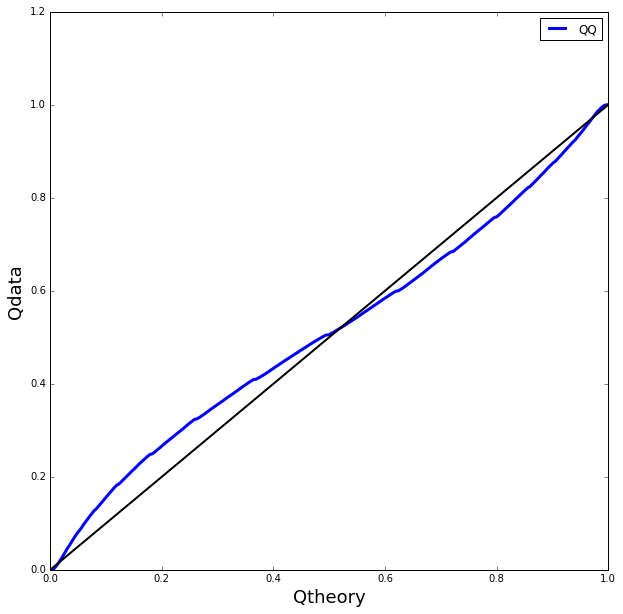

In [13]:
bpzobj.QQplot(using='gridded',dx=0.0001,Nquants=1001)

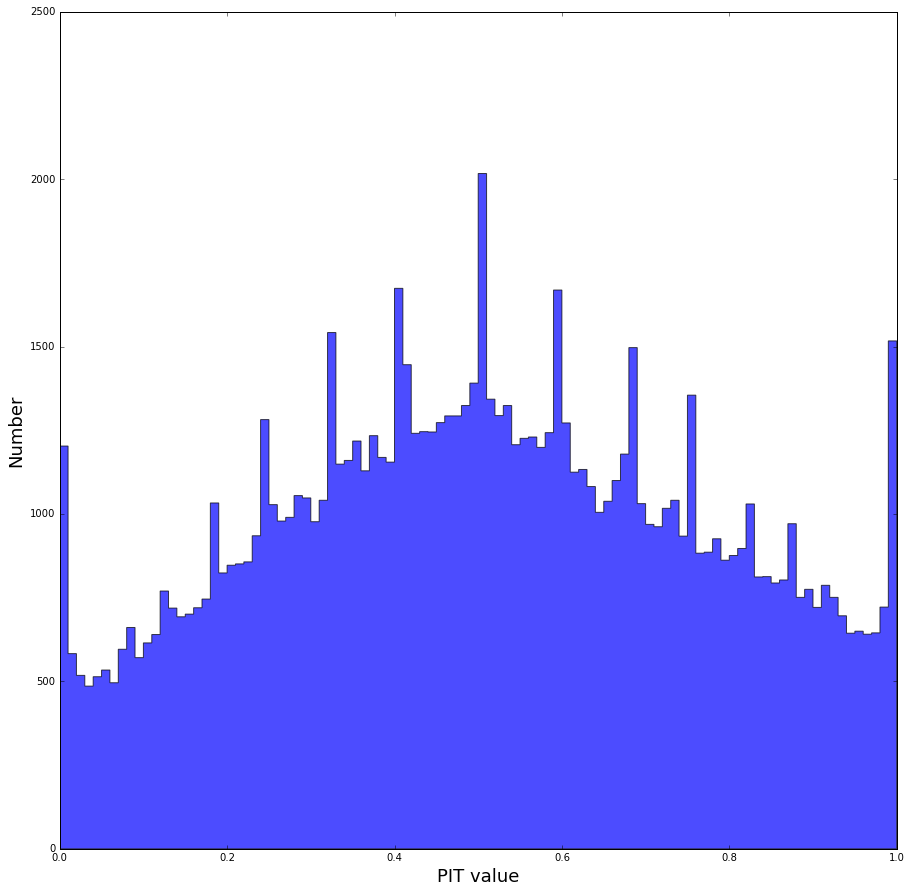

In [14]:
fig = plt.figure(figsize=(15,15))
plt.hist(bpzPIT, normed=False, histtype='stepfilled', alpha=0.7,bins=np.arange(0.0,1.01,.01))
plt.xlim([0.0,1.0])
plt.xlabel("PIT value",size=18)
plt.ylabel("Number",size=18)

# Make i<25.3 gold cut

In [15]:
print len(mags),len(z_trues)

100089 100089


In [16]:
magcut = (mags<25.3)
goldzs = z_trues[magcut]
goldpzs = pzs[magcut]
goldnumgals = len(goldzs)
print goldnumgals
print goldpzs.shape

39892
(39892, 201)


In [17]:
gold_pdf = qp.Ensemble(goldpzs.shape[0],gridded=(z_array,goldpzs))

made the pool of 4 in 0.0243787765503
made the catalog in 83.7313768864


In [18]:
goldbpzobj = inmet.EvaluateMetric(gold_pdf,goldzs)

In [19]:
goldPIT = goldbpzobj.PIT()

In [20]:
ks_stat,ks_pval = goldbpzobj.KS(using='gridded',dx=0.0001)
print ks_stat
print ks_pval

0.0580381158441
3.03614355665e-117


In [21]:
cvm_stat,cvm_pval=goldbpzobj.CvM(using='gridded',dx=0.0001)
print cvm_stat
print cvm_pval

51.8159124958
0.000456734810105


In [22]:
ad_stat,ad_pval=goldbpzobj.AD(using='gridded',dx=0.0001,vmin=0.05,vmax=0.95)
print ad_stat
print ad_pval

now with proper uniform range
278.391066038
1.62131488235e-08


In [23]:
ad_stat,ad_pval=goldbpzobj.AD(using='gridded',dx=0.0001,vmin=0.1,vmax=0.9)
print ad_stat
print ad_pval

now with proper uniform range
184.872676618
1.74962820898e-08


In [24]:
ad_stat,ad_pval=goldbpzobj.AD(using='gridded',dx=0.0001,vmin=0.8,vmax=0.95)
print ad_stat
print ad_pval

now with proper uniform range
34.6350001173
1.21852152701e-07


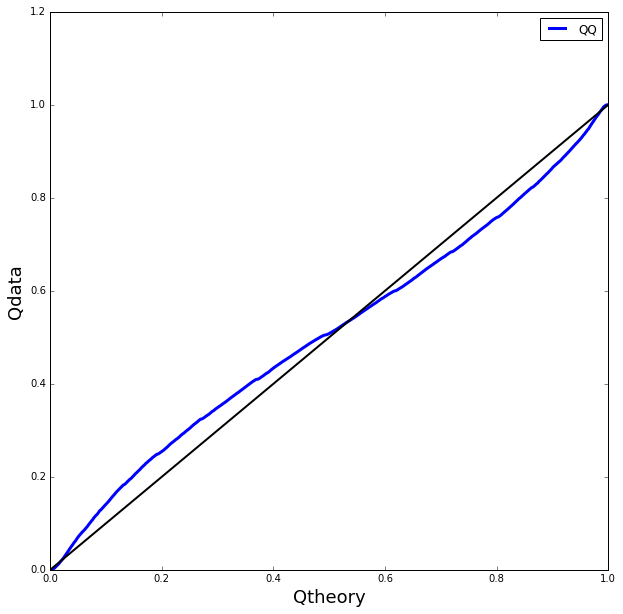

In [25]:
goldbpzobj.QQplot(using='gridded',dx=0.0001,Nquants=1001)

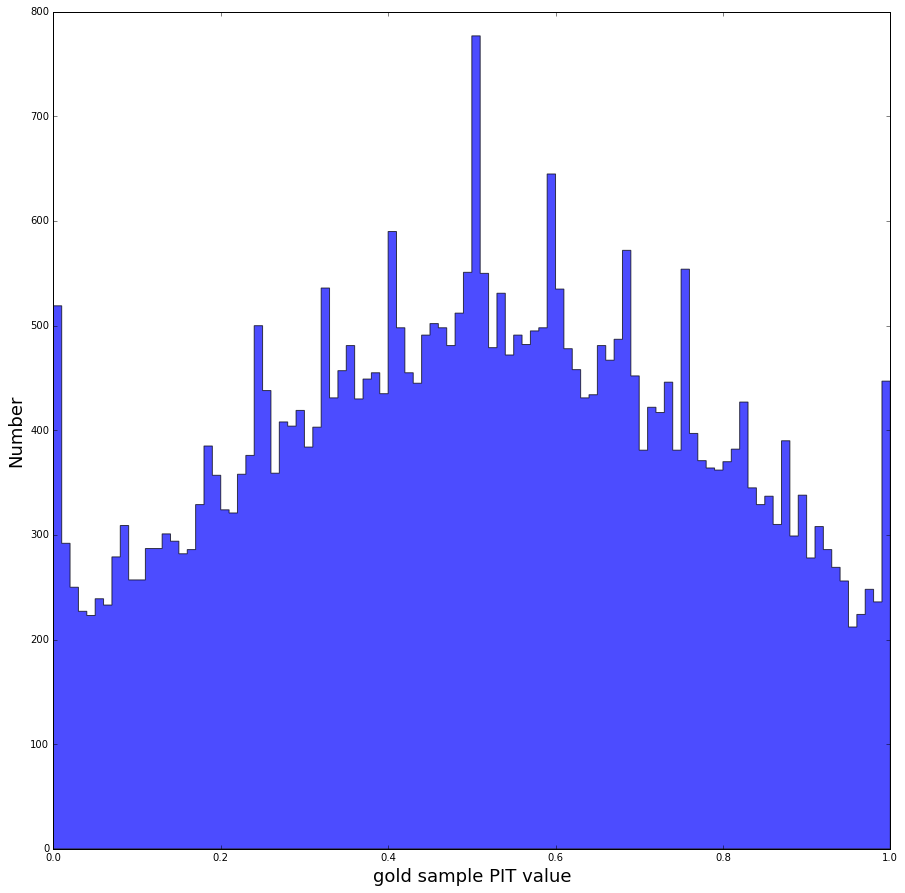

In [26]:
fig = plt.figure(figsize=(15,15))
plt.hist(goldPIT, normed=False, histtype='stepfilled', alpha=0.7,bins=np.arange(0.0,1.01,.01))
plt.xlim([0.0,1.0])
plt.xlabel("gold sample PIT value",size=18)
plt.ylabel("Number",size=18)